# Loan Default Prediction

**Author:** Jose' Barasa  
**Project:** Phase 3 - Loan default Project  




## Business Problem

A microfinance institution wants to predict which loan applicants will default on their loans. This will help them make better lending decisions and reduce financial losses.

**Stakeholder:** Risk Management Team

**Goal:** Build a classification model to identify high-risk borrowers

## 1. Import Libraries

First, I'll import all the Python libraries needed for data analysis and modeling.

In [46]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix



## 2. Load the Data

I'll load the Lending Club loan data from 2007 to 2018 Q4.

In [47]:
# Load the dataset
tb = pd.read_csv('data/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv', nrows=10000)
tb.head()



/tmp/ipykernel_26398/229292548.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  tb = pd.read_csv('data/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv', nrows=10000)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Display  information
tb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 151 entries, id to settlement_term
dtypes: float64(114), int64(1), object(36)
memory usage: 11.5+ MB


In [49]:
tb.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
tb.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [51]:
tb.shape

(10000, 151)

## 3. Data Understanding

Let's explore the dataset to understand what information we have.

In [52]:
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 151 entries, id to settlement_term
dtypes: float64(114), int64(1), object(36)
memory usage: 11.5+ MB


In [53]:
# Check loan_status values
print("Loan status values:")
print(tb['loan_status'].value_counts())

Loan status values:
loan_status
Fully Paid            7189
Charged Off           1713
Current               1024
Late (31-120 days)      58
In Grace Period         12
Late (16-30 days)        4
Name: count, dtype: int64


## 5. Data Visualizations

Let me explore key features in the dataset to understand patterns.

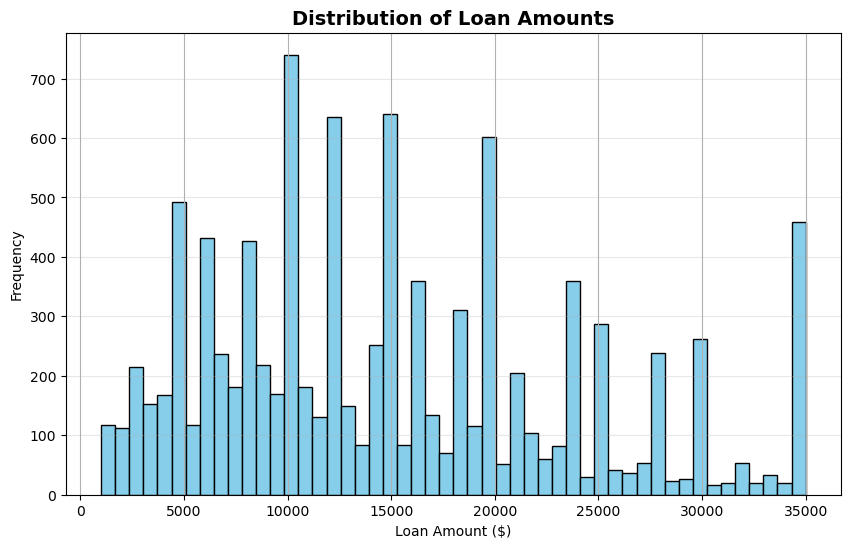

In [54]:
# 1. Loan Amount Distribution
plt.figure(figsize=(10, 6))
tb['loan_amnt'].hist(bins=50, edgecolor='black', color='skyblue')
plt.title('Distribution of Loan Amounts', fontsize=14, fontweight='bold')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()

### 5.1 Loan Amount Distribution

This shows how loan amounts are distributed across all loans.

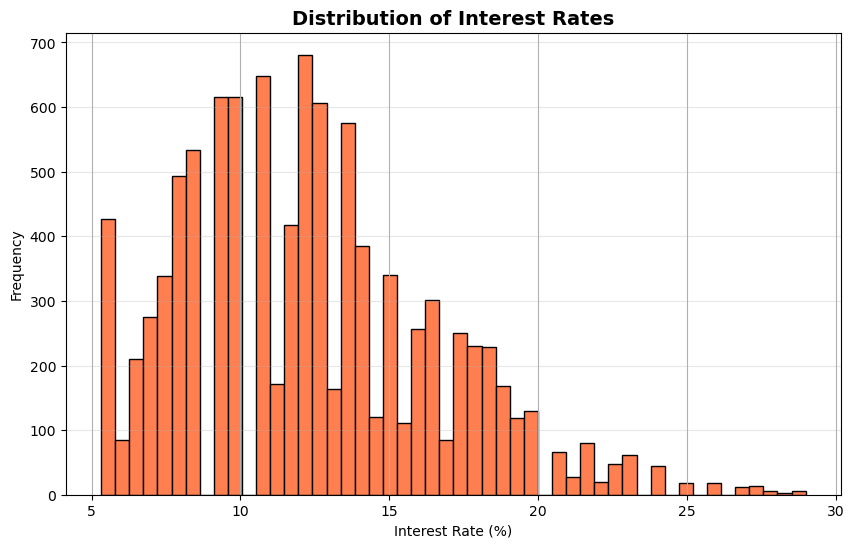

In [55]:
# 2. Interest Rate Distribution
plt.figure(figsize=(10, 6))
tb['int_rate'].hist(bins=50, edgecolor='black', color='coral')
plt.title('Distribution of Interest Rates', fontsize=14, fontweight='bold')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()

### 5.2 Interest Rate Distribution

This shows the range of interest rates offered on loans.

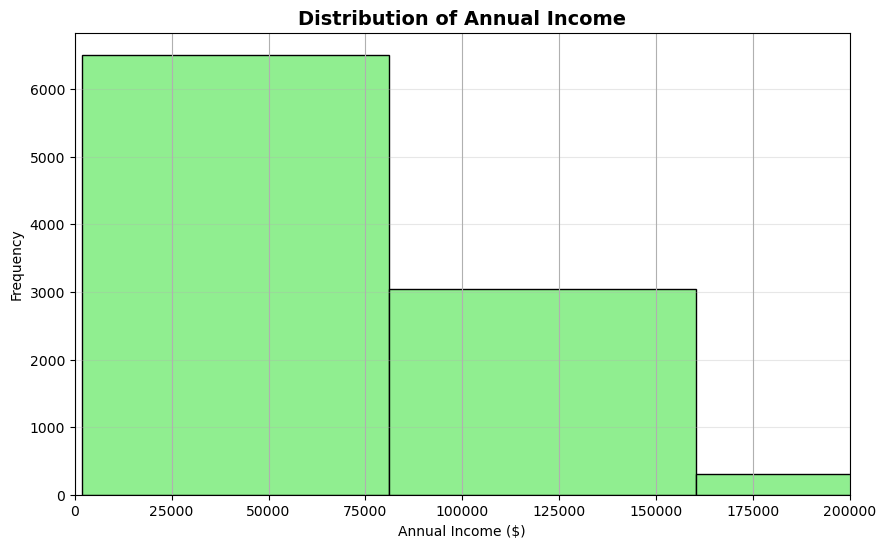

In [56]:
# 3. Annual Income Distribution
plt.figure(figsize=(10, 6))
tb['annual_inc'].hist(bins=50, edgecolor='black', color='lightgreen')
plt.title('Distribution of Annual Income', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')
plt.xlim(0, 200000)  
plt.grid(axis='y', alpha=0.3)
plt.show()

### 5.3 Annual Income Distribution

This shows the annual income of loan applicants.

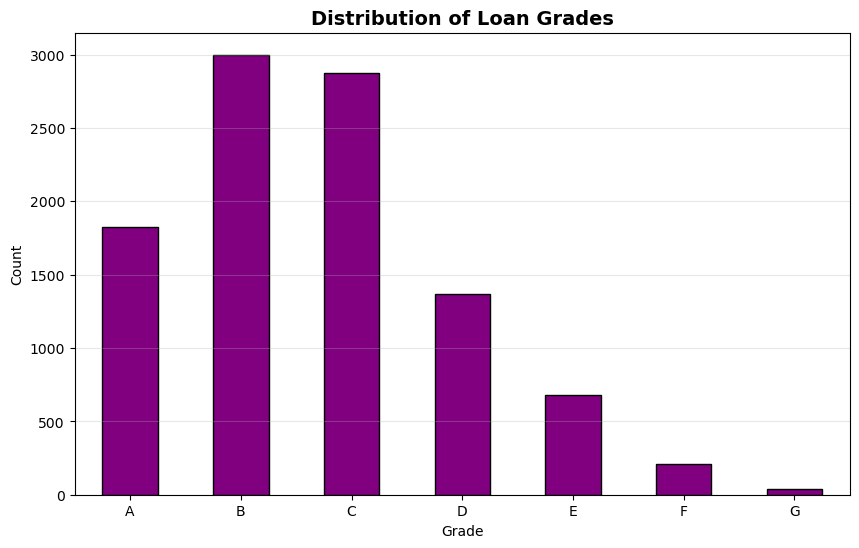

In [57]:
# 4. Loan Grade Distribution
if 'grade' in tb.columns:
    plt.figure(figsize=(10, 6))
    tb['grade'].value_counts().sort_index().plot(kind='bar', color='purple', edgecolor='black')
    plt.title('Distribution of Loan Grades', fontsize=14, fontweight='bold')
    plt.xlabel('Grade')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

### 5.4 Loan Grade Distribution

Loan grades (A through G) indicate the risk level assigned by the lender.

<Figure size 1200x600 with 0 Axes>

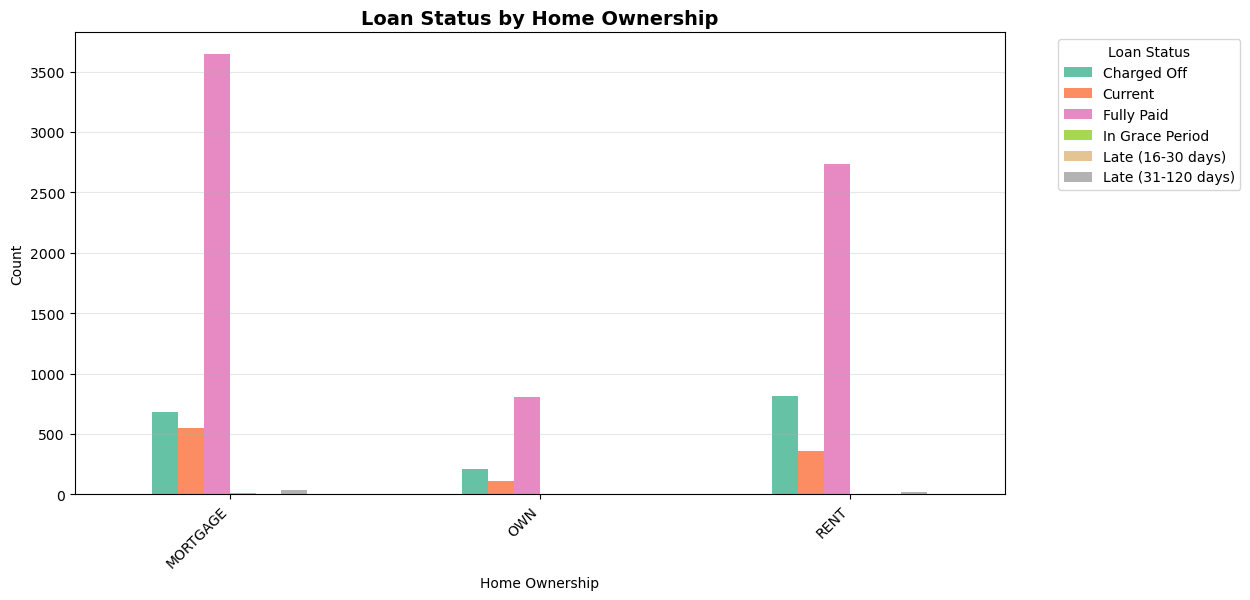

In [58]:
# 5. Loan Status by Home Ownership
if 'home_ownership' in tb.columns:
    plt.figure(figsize=(12, 6))
    pd.crosstab(tb['home_ownership'], tb['loan_status']).plot(kind='bar', figsize=(12, 6), colormap='Set2')
    plt.title('Loan Status by Home Ownership', fontsize=14, fontweight='bold')
    plt.xlabel('Home Ownership')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.show()

### 5.5 Loan Status by Home Ownership

This shows how loan outcomes vary by home ownership status.

## 6. Create Target Variable


- **1 = Default** (Charged Off or Late)
- **0 = No Default** (Fully Paid or Current)

In [59]:
# Create simple target variable
tb['default'] = tb['loan_status'].isin(['Charged Off', 'Late (31-120 days)', 'Late (16-30 days)']).astype(int)

print("Target created:")
print(tb['default'].value_counts())
print(f"\nDefault rate: {tb['default'].mean():.1%}")

Target created:
default
0    8225
1    1775
Name: count, dtype: int64

Default rate: 17.8%


## 7. Select Features

I'll use only simple numeric features that don't need much cleaning.

In [60]:
# Select only simple numeric features
features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'total_acc']

# Create simple dataset
tb_simple = tb[features + ['default']].copy()

# Remove any rows with missing values
tb_simple = tb_simple.dropna()

print(f"Dataset shape: {tb_simple.shape}")
print(f"Features: {features}")

Dataset shape: (10000, 7)
Features: ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'total_acc']


## 8. Split Data

I'll split the data into training (80%) and testing (20%) sets.

In [61]:
# Separate X and y
X = tb_simple.drop('default', axis=1)
y = tb_simple['default']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (8000, 6)
Test set: (2000, 6)


## 9. Scale Features

I'll scale the features so they're all on the same range.

In [63]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## 10. Baseline Model - Logistic Regression

I'll start with a simple logistic regression model as my baseline.

In [64]:
# Train baseline logistic regression
baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = baseline_model.predict(X_train_scaled)
y_test_pred = baseline_model.predict(X_test_scaled)



 Baseline model trained


In [65]:
# Evaluate baseline model
print("BASELINE MODEL RESULTS")
print("="*50)
print("\nTraining Set:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.3f}")
print(f"Precision: {precision_score(y_train, y_train_pred):.3f}")
print(f"Recall: {recall_score(y_train, y_train_pred):.3f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred):.3f}")

print("\nTest Set:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.3f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred):.3f}")

BASELINE MODEL RESULTS

Training Set:
Accuracy: 0.817
Precision: 0.467
Recall: 0.048
F1-Score: 0.087

Test Set:
Accuracy: 0.838
Precision: 0.459
Recall: 0.053
F1-Score: 0.095


## 11. Improved Model - Decision Tree

I'll try a decision tree model to see if it performs better.

In [66]:
# Train decision tree (no scaling needed)
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_train_pred_tree = tree_model.predict(X_train)
y_test_pred_tree = tree_model.predict(X_test)



In [67]:
# Evaluate decision tree
print("DECISION TREE RESULTS")
print("="*50)
print("\nTraining Set:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_tree):.3f}")
print(f"Precision: {precision_score(y_train, y_train_pred_tree):.3f}")
print(f"Recall: {recall_score(y_train, y_train_pred_tree):.3f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred_tree):.3f}")

print("\nTest Set:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_tree):.3f}")
print(f"Precision: {precision_score(y_test, y_test_pred_tree):.3f}")
print(f"Recall: {recall_score(y_test, y_test_pred_tree):.3f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_tree):.3f}")

DECISION TREE RESULTS

Training Set:
Accuracy: 0.823
Precision: 0.600
Recall: 0.081
F1-Score: 0.142

Test Set:
Accuracy: 0.834
Precision: 0.407
Recall: 0.068
F1-Score: 0.117
